In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 딥러닝

- 머신러닝의 단점
  - 엑셀, 테이블(행과 열로 이루어진)과 같은 데이터만 학습 가능

- 이미지, 영상, 음성 등 다양한 데이터 예측 가능
- 이미지 생성, 문자열 분석, 영상 예측

# 딥러닝 시작!
  - AND, OR, XOR 논리 학습하기 by 단일 퍼셉트론
    - model.add(Dense(units=1, input_dim=2)
    - **단일 퍼셉트론** : 한 층에 하나의 퍼셉트론을 사용
    - AND, OR 논리는 구분 가능/ But, XOR논리는 구분 불가능!
  - XOR논리 by 다중 퍼셉트론
    - model.add(Dense(units=1, input_dim=2)  # OR논리 구분<br>
      model.add(Dense(units=1))  # OR논리 반대 여부 구분 >> XOR논리 구분

<img src="https://drive.google.com/uc?id=1ly_A13Pl5rxoC0N4IrCgYAtomnANOR1J">

##### **다중 퍼셉트론(MLP; Multi Layer Perceptron)**
- 두 개 이상의의 층으로 이루어짐(각 층은 하나의 퍼셉트론으로 이루어짐)
- MLP를 기반으로 다양한 모델이 파생 : CNN, RNN, LSTM, YOLO
- 학습해야할 특성의 수, 데이터에 따라 층의 수가 달라짐
- 층 수가 많아지면 : 학습시간이 길어짐, 과적합
<br><br>

## 딥러닝 구조
- 입력층 : 데이터를 입려받는 층 (1개의 층)
- 중간층(은닉층) : 분석(예측)을 진행하는 층 (층의 갯수에 제한X)
- 출력층 : 분석 내용을 종합해서 결과를 출력 (1개의 층)


## 딥러닝 실행 방법
- 머신러닝 中 KNN
  - knn = KNeighborClassifier()<br>
  knn.fit(X_train, y_train)

- 딥러닝

  1) **모델 설계** : 신경망 생성(Sequential), 입력층, 중간층, 출력층을 쌓아 주는 것

    - **활성화함수(activation)** : 다음 계층으로 신호를 전달할때, 전 계층의 생각을 전달하기 위함
      - 종류 (사용가능한 층)
        - sigmoid (입력, 중간, 출력) 
        - tanh (입력, 중간)
        - softmax (출력) 
        - relu (입력, 중간)
      - 사용 가능한 층에 따른 설명 
          - '출력 층에서 사용 가능하다.' == '입력 값을 종합할 수 있다.'
            - sigmoid : 출력 (0, 1) : 이진분류에 사용 >> accuracy와 출력 범위 동일
            - softmax : class의 값 개수 만큼 출력 가능 : 다진 분류에 사용<br>
              (one-hot encoding 시, 사용)
    
            <img src="https://drive.google.com/uc?id=1xA6enEzqcgyDIEdnrrunIpb81YFDIpdT"><br>
          - 입력, 중간층 : 보통 **relu**를 많이 사용<br>
          (why? 기울기 소실의 문제가 발생하지 않음)

      - target에 따른 구분
          - [분류(Classification)] 단일 출력 : sigmoid/ 다중 출력 : softmax
          - [회귀(Regression)] 출력층에 아무 값도 입력X(꼭 쓰려면 linear)
            - 회귀는 연속적인 값 >> 사실상 출력값이 1개
            - 딥러닝에서는 회귀는 주로 많이 하지 않는 편
      - 이 활성함수 언제 사용하나요?
          - sigmoid : 입력(-∞, ∞)/ 출력(0, 1)/ sigmoid 미분값 (0, 0.25]
          <img src="https://drive.google.com/uc?id=15kQL2T4bGfqLKj0JFvgtJfzXuEq6riM6"><br>
            - 기울기 소실로 많이 사용X >> 사실상 출력층에서만 사용
          - tanh : 입력(-∞, ∞)/ 출력(-1, 1)/ tanh 미분값 (0, 0.5]
          <img src="https://drive.google.com/uc?id=1g8AaJMTHoqisd1f_6D-E8dm-5jA2OdNg"><br>
            - sigmoid 기울기 소실이 sigmoid보다는 덜 발생하지만 기울기 소실o
            - LSTM, RNN에서 가끔 사용
          - relu : 입력(-∞, ∞)/ 출력(0, ∞)/ relu 미분값 0 or 1
          <img src="https://drive.google.com/uc?id=15tp5rlnmmZ0QBJlv3nOaXgSyfqHvYQwM"><br>
            - 기울기 소실x : 층이 깊어질수록 relu!

      <br><br>

  2) **실행 방법 설계(Compile)** : 작성한 신경망을 학습을 할 수 있도록 컴파일
  - 오차(loss), 최적화함수(optimizer), 평가 방법(metrics)을 설계
  - Why?
    - 머신러닝 : 이미 만들어진 모델을 사용 >> 사용법 설계X
    - 딥러닝 : 모델을 직접 설계 >> 사용법도 직접 설계해야 함

  - **오차(loss)** : 사용할 손실함수(비용함수)
    - 회귀 : mse 또는 mean_squared_error (평균 제곱 오차 - 회귀)
    - 이진분류 : binary_crossentropy (이진분류)
    - 다진분류 : categorical_crossentropy (다진분류)<br><br>
    - **손실함수** : 오차를 구하는 함수
      - 얼마나 많이 오차 발생? 얼마나 많이 개선?
      - 순전파에서 오차를 구해서 역전파에서 반영시키기 위해 사용
  
  - **경사하강법(=최적화 함수, optimizer)**

  <img src="https://drive.google.com/uc?id=1jhzrvQjDR9Ersdm_D6hrP0nsmdMFTKo4">

    - 만든 모델이 잘 만들었는지 확인하기 위한 것
      - 오차 큼 >> 잘못 만든 모델 >> 수정 필요
      - 오차 작음 >> 잘 만든 모델
    
  - **평가 방법(metrics)** : 정확도 또는 오차
    - 회귀에서는 평가 방법을 따로 쓰지 않음 <br>
    (why? metrics=["mse"]이지만 default 값이라 생략 가능/
    "오차 == 평가 방법")
    - 분류 : accuracy

  3) **학습(fit)** 
    - 머신러닝 : 한번만 학습하고 정답을 찾음
    - 딥러닝 : 매우 여러번의 학습으로 모델을 개선

  **fit(X, y, batch_size, epochs)  #fit(문제, 정답, 한번에 학습 할 데이터 수, 반복 횟수)**

    - batch_size : 한번에 학습 할 데이터 수
      - 컴퓨터의 성능이 좋을 수록 크게 잡아도 됨 (내 컴퓨터 성능에 맞게 설정)
      - 학습은 batch_size가 클수록 잘됨
    - epoch : 반복 학습 횟수

  4) **개선**
  - 순전파(>> 추론)
    - 입력데이터를 '입력층 -> 출력층'까지 전파 >> 결과를 추론
  - 역전파(>> 학습)
    - 추론된 결과 >> 에러를 계산
    - '출력층 -> 입력층'으로 에러를 전파 >> 모델 최적화<br><br>
  - 오차역전파 : 딥러닝 모델이 문제데이터로 정답데이터의 규칙을 찾는다.





# 1. 문제정의 : wine데이터를 사용해서 wine의 도수를 예측해보자!

In [170]:
# 2.데이터로드
import pandas as pd
wine = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_Learning/data/wine.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [171]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [172]:
# 회귀 문제
wine['alcohol']

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
6492    11.2
6493     9.6
6494     9.4
6495    12.8
6496    11.8
Name: alcohol, Length: 6497, dtype: float64

In [173]:
# 3. 데이터 전처리
# 도수(alcohol)을 정답으로
# 나머지를 문제로 만들기

y1 = wine['alcohol']
X1 = wine.copy()
del X1['alcohol']

In [174]:
X1.shape, y1.shape

((6497, 12), (6497,))

In [175]:
# 4. 탐색적 데이터 분석
# 머신러닝 - 데이터를 직접 살펴보고 특징을 추출해야 분석을 잘했음
# 딥러닝 - 데이터 특징 추출 마저도 모델이 할 수 있음
# 딥러닝에서는 거의 생략

In [176]:
# (머신러닝 5. 모델 선택 및 하이퍼 파라미터 튜닝)
# 딥러닝 5. 모델 설계 및 학습방법 설정 
# Keras Framework 만들기
from tensorflow.keras.models import Sequential  # 신경망 만들기
from tensorflow.keras.layers import Dense  # 딥러닝 구조에 퍼셉트론층 쌓기

model1 = Sequential()  # 신경망 생성

# 입력층
# 신경망명.add(Dense(units=퍼셉트론 수, input_dim=특성데이터 칼럼수, activation=활성화 함수))
model1.add(Dense(units=32, input_dim=12, activation="sigmoid"))

# 중간층(은닉층)
# 신경망명.add(Dense(units=퍼셉트론 수, activation=활성화 함수))
# 그 전층에서 출력값이 입력값으로 자동 설정되기 때문에 inpu_dim은 생략
# 원하는 만큼 층을 쌓아줄 수 있음
model1.add(Dense(units=64, input_dim=12, activation="sigmoid"))
model1.add(Dense(units=32, activation="sigmoid"))
model1.add(Dense(units=16, activation="sigmoid"))

# 출력층
# 퍼셉트론 수(결과 데이터의 수), 활성화 함수
# 회귀 : 1개 / 이진분류 : 1 or 2개 / 다진분류 : class 개수
model1.add(Dense(units=1))

model1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 32)                416       
                                                                 
 dense_80 (Dense)            (None, 64)                2112      
                                                                 
 dense_81 (Dense)            (None, 32)                2080      
                                                                 
 dense_82 (Dense)            (None, 16)                528       
                                                                 
 dense_83 (Dense)            (None, 1)                 17        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [177]:
# 모델
# model compile : loss="mse" / optimizer="adam" / metrics=["mse"] (기본값이라 생략 가능)
model1.compile(loss="mse",
               optimizer="adam",
               metrics=["mse"])

In [178]:
# 6. 학습 : 문제 데이터, 정답데이터, batch_size, 학습 횟수
h1 = model1.fit(X1, y1, batch_size=100, epochs=100)

Epoch 1/100
65/65 [==============================] - 1s 2ms/step - loss: 87.5926 - mse: 87.5926
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 58.0178 - mse: 58.0178
Epoch 3/100
65/65 [==============================] - 0s 3ms/step - loss: 46.5612 - mse: 46.5612
Epoch 4/100
65/65 [==============================] - 0s 2ms/step - loss: 39.0297 - mse: 39.0297
Epoch 5/100
65/65 [==============================] - 0s 2ms/step - loss: 33.0330 - mse: 33.0330
Epoch 6/100
65/65 [==============================] - 0s 2ms/step - loss: 27.9684 - mse: 27.9684
Epoch 7/100
65/65 [==============================] - 0s 2ms/step - loss: 23.1187 - mse: 23.1187
Epoch 8/100
65/65 [==============================] - 0s 3ms/step - loss: 17.8419 - mse: 17.8419
Epoch 9/100
65/65 [==============================] - 0s 2ms/step - loss: 14.0376 - mse: 14.0376
Epoch 10/100
65/65 [==============================] - 0s 2ms/step - loss: 11.1528 - mse: 11.1528
Epoch 11/100
65/65 [===================

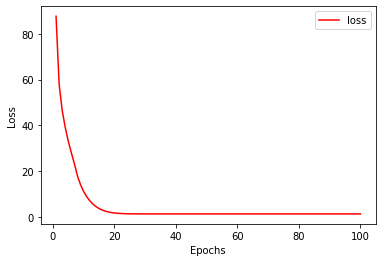

In [179]:
# 시각화
import matplotlib.pyplot as plt

loss1 = h1.history["loss"]

xaxis = range(1, len(loss1) + 1)

plt.plot(xaxis, loss1, "r", label="loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### 퍼셉트론 층 7개 쌓기

In [180]:
# (머신러닝 5. 모델 선택 및 하이퍼 파라미터 튜닝)
# 딥러닝 5. 모델 설계 및 학습방법 설정 
# Keras Framework 만들기
from tensorflow.keras.models import Sequential  # 신경망 만들기
from tensorflow.keras.layers import Dense  # 딥러닝 구조에 퍼셉트론층 쌓기

model2 = Sequential()  # 신경망 생성

# 입력층
# 신경망명.add(Dense(units=퍼셉트론 수, input_dim=특성데이터 칼럼수, activation=활성화 함수))
model2.add(Dense(units=32, input_dim=12, activation="sigmoid"))

# 중간층(은닉층)
# 신경망명.add(Dense(units=퍼셉트론 수, activation=활성화 함수))
# 그 전층에서 출력값이 입력값으로 자동 설정되기 때문에 inpu_dim은 생략
# 원하는 만큼 층을 쌓아줄 수 있음
model2.add(Dense(units=64, input_dim=12, activation="sigmoid"))
model2.add(Dense(units=128, activation="sigmoid"))
model2.add(Dense(units=64, activation="sigmoid"))
model2.add(Dense(units=32, activation="sigmoid"))
model2.add(Dense(units=16, activation="sigmoid"))

# 출력층
# 퍼셉트론 수(결과 데이터의 수), 활성화 함수
# 회귀 : 1개 / 이진분류 : 1 or 2개 / 다진분류 : class 개수
model2.add(Dense(units=1))

model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 32)                416       
                                                                 
 dense_85 (Dense)            (None, 64)                2112      
                                                                 
 dense_86 (Dense)            (None, 128)               8320      
                                                                 
 dense_87 (Dense)            (None, 64)                8256      
                                                                 
 dense_88 (Dense)            (None, 32)                2080      
                                                                 
 dense_89 (Dense)            (None, 16)                528       
                                                                 
 dense_90 (Dense)            (None, 1)               

In [181]:
# 모델
# model compile : loss="mse" / optimizer="adam" / metrics=["mse"] (기본값이라 생략 가능)
model2.compile(loss="mse",
               optimizer="adam",
               metrics=["mse"])

In [182]:
# 6. 학습 : 문제 데이터, 정답데이터, batch_size, 학습 횟수
h2 = model2.fit(X1, y1, batch_size=100, epochs=100)

Epoch 1/100
65/65 [==============================] - 1s 3ms/step - loss: 86.6415 - mse: 86.6415
Epoch 2/100
65/65 [==============================] - 0s 3ms/step - loss: 58.3160 - mse: 58.3160
Epoch 3/100
65/65 [==============================] - 0s 3ms/step - loss: 44.4361 - mse: 44.4361
Epoch 4/100
65/65 [==============================] - 0s 4ms/step - loss: 35.4771 - mse: 35.4771
Epoch 5/100
65/65 [==============================] - 0s 4ms/step - loss: 28.6286 - mse: 28.6286
Epoch 6/100
65/65 [==============================] - 0s 6ms/step - loss: 23.1048 - mse: 23.1048
Epoch 7/100
65/65 [==============================] - 0s 6ms/step - loss: 18.5854 - mse: 18.5854
Epoch 8/100
65/65 [==============================] - 0s 4ms/step - loss: 14.8860 - mse: 14.8860
Epoch 9/100
65/65 [==============================] - 0s 4ms/step - loss: 11.8762 - mse: 11.8762
Epoch 10/100
65/65 [==============================] - 0s 5ms/step - loss: 9.4438 - mse: 9.4438
Epoch 11/100
65/65 [=====================

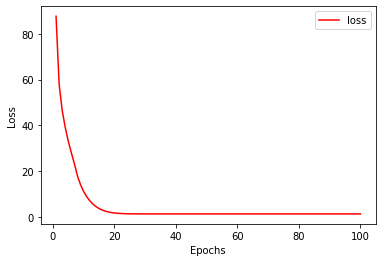

In [183]:
# 시각화
import matplotlib.pyplot as plt

loss2 = h1.history["loss"]

xaxis = range(1, len(loss2) + 1)

plt.plot(xaxis, loss2, "r", label="loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [184]:
# 7. 평가
model2.evaluate(X1, y1)

# 총 5개의 층 활성화함수 : sigmoid > loss = 1.42
# 총 7개의 층 활성화함수 : sigmoid > loss = 1.42  (층 늘리기 효과X)
# 총 7개의 층 활성화함수 : relu > loss = 0.75  (활성화함수 : relu 효과O)

204/204 [==============================] - 0s 2ms/step - loss: 1.4226 - mse: 1.4226


[1.4225904941558838, 1.4225904941558838]

## 활성화 함수 바꾸기 : relu

In [185]:
# (머신러닝 5. 모델 선택 및 하이퍼 파라미터 튜닝)
# 딥러닝 5. 모델 설계 및 학습방법 설정 
# Keras Framework 만들기
from tensorflow.keras.models import Sequential  # 신경망 만들기
from tensorflow.keras.layers import Dense  # 딥러닝 구조에 퍼셉트론층 쌓기

model3 = Sequential()  # 신경망 생성

# 입력층
# 신경망명.add(Dense(units=퍼셉트론 수, input_dim=특성데이터 칼럼수, activation=활성화 함수))
model3.add(Dense(units=32, input_dim=12, activation="relu"))

# 중간층(은닉층)
# 신경망명.add(Dense(units=퍼셉트론 수, activation=활성화 함수))
# 그 전층에서 출력값이 입력값으로 자동 설정되기 때문에 inpu_dim은 생략
# 원하는 만큼 층을 쌓아줄 수 있음
model3.add(Dense(units=64, input_dim=12, activation="relu"))
model3.add(Dense(units=128, activation="relu"))
model3.add(Dense(units=64, activation="relu"))
model3.add(Dense(units=32, activation="relu"))
model3.add(Dense(units=16, activation="relu"))

# 출력층
# 퍼셉트론 수(결과 데이터의 수), 활성화 함수
# 회귀 : 1개 / 이진분류 : 1 or 2개 / 다진분류 : class 개수
model3.add(Dense(units=1))

model3.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 32)                416       
                                                                 
 dense_92 (Dense)            (None, 64)                2112      
                                                                 
 dense_93 (Dense)            (None, 128)               8320      
                                                                 
 dense_94 (Dense)            (None, 64)                8256      
                                                                 
 dense_95 (Dense)            (None, 32)                2080      
                                                                 
 dense_96 (Dense)            (None, 16)                528       
                                                                 
 dense_97 (Dense)            (None, 1)               

In [186]:
# 모델
# model compile : loss="mse" / optimizer="adam" / metrics=["mse"] (기본값이라 생략 가능)
model3.compile(loss="mse",
               optimizer="adam",
               metrics=["mse"])

In [187]:
# 6. 학습 : 문제 데이터, 정답데이터, batch_size, 학습 횟수
h3 = model3.fit(X1, y1, batch_size=100, epochs=100)

Epoch 1/100
65/65 [==============================] - 1s 3ms/step - loss: 11.8716 - mse: 11.8716
Epoch 2/100
65/65 [==============================] - 0s 3ms/step - loss: 1.7011 - mse: 1.7011
Epoch 3/100
65/65 [==============================] - 0s 3ms/step - loss: 1.3877 - mse: 1.3877
Epoch 4/100
65/65 [==============================] - 0s 3ms/step - loss: 1.2729 - mse: 1.2729
Epoch 5/100
65/65 [==============================] - 0s 3ms/step - loss: 1.4038 - mse: 1.4038
Epoch 6/100
65/65 [==============================] - 0s 4ms/step - loss: 1.1483 - mse: 1.1483
Epoch 7/100
65/65 [==============================] - 0s 3ms/step - loss: 1.1952 - mse: 1.1952
Epoch 8/100
65/65 [==============================] - 0s 3ms/step - loss: 1.0590 - mse: 1.0590
Epoch 9/100
65/65 [==============================] - 0s 3ms/step - loss: 1.1465 - mse: 1.1465
Epoch 10/100
65/65 [==============================] - 0s 3ms/step - loss: 1.0885 - mse: 1.0885
Epoch 11/100
65/65 [==============================] - 0s 

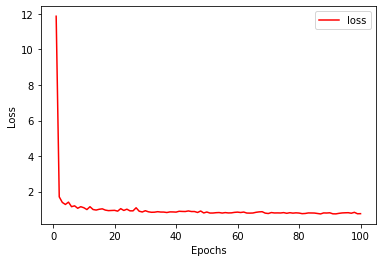

In [188]:
# 시각화
import matplotlib.pyplot as plt

loss3 = h3.history["loss"]

xaxis = range(1, len(loss3) + 1)

plt.plot(xaxis, loss3, "r", label="loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [189]:
# 7. 평가
model3.evaluate(X1, y1)

# 총 5개의 층 활성화함수 : sigmoid > loss = 1.42
# 총 7개의 층 활성화함수 : sigmoid > loss = 1.42  (층 늘리기 효과X)
# 총 7개의 층 활성화함수 : relu > loss = 0.97  (활성화함수 : relu 효과O)

204/204 [==============================] - 0s 2ms/step - loss: 0.9726 - mse: 0.9726


[0.9725865125656128, 0.9725865125656128]

# 분류실습 :  화이트와인과 레드와인 구분하기

In [161]:
# 분류 실습 화이트와인과 레드와인 구분하기
wine['type'].unique()

array([1, 0])

In [164]:
y2 = wine['type']
X2 = wine.copy()
del X2["type"]

X2.shape, y2.shape

((6497, 12), (6497,))

### 이진분류

In [199]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model4 = Sequential()

# 입력층
model4.add(Dense(units=32,input_dim=12, activation="relu"))

# 중간층(은닉층)
model4.add(Dense(units=64, activation="relu"))
model4.add(Dense(units=128, activation="relu"))
model4.add(Dense(units=64, activation="relu"))
model4.add(Dense(units=32, activation="relu"))
model4.add(Dense(units=16, activation="relu"))

# 출력층
model4.add(Dense(units=1, activation="sigmoid"))

model4.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 32)                416       
                                                                 
 dense_99 (Dense)            (None, 64)                2112      
                                                                 
 dense_100 (Dense)           (None, 128)               8320      
                                                                 
 dense_101 (Dense)           (None, 64)                8256      
                                                                 
 dense_102 (Dense)           (None, 32)                2080      
                                                                 
 dense_103 (Dense)           (None, 16)                528       
                                                                 
 dense_104 (Dense)           (None, 1)               

In [200]:
model4.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [201]:
h4 = model4.fit(X2, y2, batch_size=100, epochs=100)

Epoch 1/100
65/65 [==============================] - 1s 3ms/step - loss: 0.2881 - accuracy: 0.8642
Epoch 2/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1947 - accuracy: 0.9337
Epoch 3/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1879 - accuracy: 0.9346
Epoch 4/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1701 - accuracy: 0.9426
Epoch 5/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1464 - accuracy: 0.9478
Epoch 6/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1381 - accuracy: 0.9503
Epoch 7/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1279 - accuracy: 0.9531
Epoch 8/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 0.9598
Epoch 9/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1082 - accuracy: 0.9628
Epoch 10/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1023 - accuracy: 0.9643
Epoch 11/

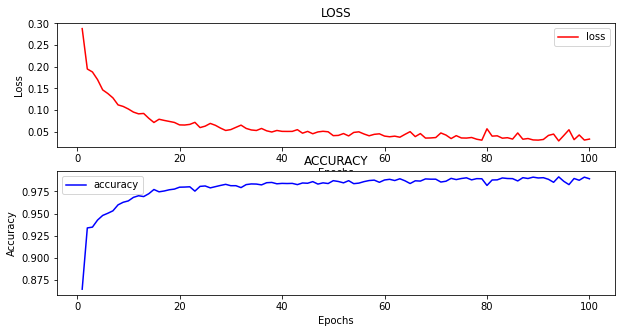

In [202]:
# 시각화
import matplotlib.pyplot as plt

loss4 = h4.history["loss"]
acc4 = h4.history["accuracy"]

xaxis = range(1, len(loss4) + 1)

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(xaxis, loss4, "r", label="loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS")

plt.subplot(2, 1, 2)
plt.plot(xaxis, acc4, "b", label="accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ACCURACY")
plt.show()

In [206]:
model4.evaluate(X2, y2)

204/204 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.9934


[0.02359878271818161, 0.9933815598487854]

## 다진분류

In [205]:
y_en2 = pd.get_dummies(y2)

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [211]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model5 = Sequential()

# 입력층
model5.add(Dense(units=32,input_dim=12, activation="relu"))

# 중간층(은닉층)
model5.add(Dense(units=64, activation="relu"))
model5.add(Dense(units=128, activation="relu"))
model5.add(Dense(units=64, activation="relu"))
model5.add(Dense(units=32, activation="relu"))
model5.add(Dense(units=16, activation="relu"))

# 출력층
model5.add(Dense(units=2, activation="softmax"))

model5.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 32)                416       
                                                                 
 dense_113 (Dense)           (None, 64)                2112      
                                                                 
 dense_114 (Dense)           (None, 128)               8320      
                                                                 
 dense_115 (Dense)           (None, 64)                8256      
                                                                 
 dense_116 (Dense)           (None, 32)                2080      
                                                                 
 dense_117 (Dense)           (None, 16)                528       
                                                                 
 dense_118 (Dense)           (None, 2)               

In [212]:
model5.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [213]:
h5 = model5.fit(X2, y_en2, batch_size=100, epochs=100)

Epoch 1/100
65/65 [==============================] - 1s 3ms/step - loss: 0.5576 - accuracy: 0.8752
Epoch 2/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1933 - accuracy: 0.9341
Epoch 3/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1830 - accuracy: 0.9372
Epoch 4/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9389
Epoch 5/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1593 - accuracy: 0.9446
Epoch 6/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1601 - accuracy: 0.9424
Epoch 7/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1489 - accuracy: 0.9472
Epoch 8/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1331 - accuracy: 0.9529
Epoch 9/100
65/65 [==============================] - 0s 3ms/step - loss: 0.1171 - accuracy: 0.9604
Epoch 10/100
65/65 [==============================] - 0s 4ms/step - loss: 0.1194 - accuracy: 0.9578
Epoch 11/

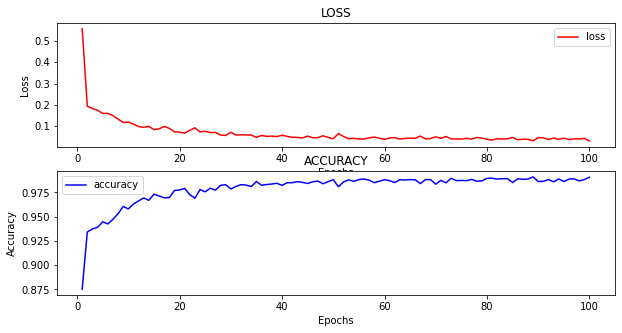

In [214]:
# 시각화
import matplotlib.pyplot as plt

loss5 = h5.history["loss"]
acc5 = h5.history["accuracy"]

xaxis = range(1, len(loss5) + 1)

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(xaxis, loss5, "r", label="loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS")

plt.subplot(2, 1, 2)
plt.plot(xaxis, acc5, "b", label="accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ACCURACY")
plt.show()

In [215]:
model5.evaluate(X2, y_en2)

204/204 [==============================] - 1s 2ms/step - loss: 0.0265 - accuracy: 0.9920


[0.026538118720054626, 0.9919962882995605]